In [ ]:
%matplotlib inline


# Phase Unwrapping


Some signals can only be observed modulo 2*pi, and this can also apply to
two- and three dimensional images. In these cases phase unwrapping is
needed to recover the underlying, unwrapped signal. In this example we will
demonstrate an algorithm [1]_ implemented in ``skimage`` at work for such a
problem. One-, two- and three dimensional images can all be unwrapped using
skimage. Here we will demonstrate phase unwrapping in the two dimensional case.



In [1]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import data, img_as_float, color, exposure
from skimage.restoration import unwrap_phase


# Load an image as a floating-point grayscale
image = color.rgb2gray(img_as_float(data.chelsea()))
# Scale the image to [0, 4*pi]
image = exposure.rescale_intensity(image, out_range=(0, 4 * np.pi))
# Create a phase-wrapped image in the interval [-pi, pi)
image_wrapped = np.angle(np.exp(1j * image))
# Perform phase unwrapping
image_unwrapped = unwrap_phase(image_wrapped)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'})
ax1, ax2, ax3, ax4 = ax.ravel()

fig.colorbar(ax1.imshow(image, cmap='gray', vmin=0, vmax=4 * np.pi), ax=ax1)
ax1.set_title('Original')

fig.colorbar(ax2.imshow(image_wrapped, cmap='gray', vmin=-np.pi, vmax=np.pi),
             ax=ax2)
ax2.set_title('Wrapped phase')

fig.colorbar(ax3.imshow(image_unwrapped, cmap='gray'), ax=ax3)
ax3.set_title('After phase unwrapping')

fig.colorbar(ax4.imshow(image_unwrapped - image, cmap='gray'), ax=ax4)
ax4.set_title('Unwrapped minus original')

The unwrapping procedure accepts masked arrays, and can also optionally
assume cyclic boundaries to connect edges of an image. In the example below,
we study a simple phase ramp which has been split in two by masking
a row of the image.



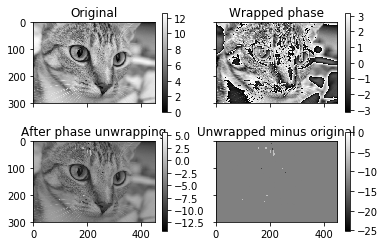

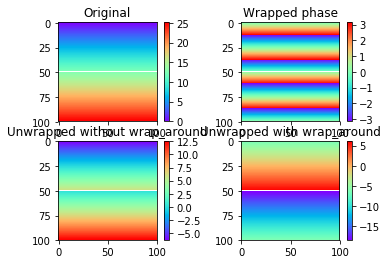

In [2]:
# Create a simple ramp
image = np.ones((100, 100)) * np.linspace(0, 8 * np.pi, 100).reshape((-1, 1))
# Mask the image to split it in two horizontally
mask = np.zeros_like(image, dtype=np.bool)
mask[image.shape[0] // 2, :] = True

image_wrapped = np.ma.array(np.angle(np.exp(1j * image)), mask=mask)
# Unwrap image without wrap around
image_unwrapped_no_wrap_around = unwrap_phase(image_wrapped,
                                              wrap_around=(False, False))
# Unwrap with wrap around enabled for the 0th dimension
image_unwrapped_wrap_around = unwrap_phase(image_wrapped,
                                           wrap_around=(True, False))

fig, ax = plt.subplots(2, 2)
ax1, ax2, ax3, ax4 = ax.ravel()

fig.colorbar(ax1.imshow(np.ma.array(image, mask=mask), cmap='rainbow'), ax=ax1)
ax1.set_title('Original')

fig.colorbar(ax2.imshow(image_wrapped, cmap='rainbow', vmin=-np.pi, vmax=np.pi),
             ax=ax2)
ax2.set_title('Wrapped phase')

fig.colorbar(ax3.imshow(image_unwrapped_no_wrap_around, cmap='rainbow'),
             ax=ax3)
ax3.set_title('Unwrapped without wrap_around')

fig.colorbar(ax4.imshow(image_unwrapped_wrap_around, cmap='rainbow'), ax=ax4)
ax4.set_title('Unwrapped with wrap_around')

plt.show()

In the figures above, the masked row can be seen as a white line across
the image. The difference between the two unwrapped images in the bottom row
is clear: Without unwrapping (lower left), the regions above and below the
masked boundary do not interact at all, resulting in an offset between the
two regions of an arbitrary integer times two pi. We could just as well have
unwrapped the regions as two separate images. With wrap around enabled for the
vertical direction (lower right), the situation changes: Unwrapping paths are
now allowed to pass from the bottom to the top of the image and vice versa, in
effect providing a way to determine the offset between the two regions.

References
----------

.. [1] Miguel Arevallilo Herraez, David R. Burton, Michael J. Lalor,
       and Munther A. Gdeisat, "Fast two-dimensional phase-unwrapping
       algorithm based on sorting by reliability following a noncontinuous
       path", Journal Applied Optics, Vol. 41, No. 35, pp. 7437, 2002

